# Entrega Final - Fundamentos de Econometría Aplicada 2025-01

**link github**:
https://github.com/alfredoaroterleira/Econometria_final 

**Intregrantes**
- Romina Loayza
- Nicolás Gutiérrez
- Alfredo Aro

## Pregunta de investigación: ¿Cuáles son los factores socieconómicos que influyen en el salario mensual de la población venezolano migrante 2022?

La crisis en Venezuela ha provocado uno de los mayores flujos migratorios de la región, con más de 1.3 millones de migrantes venezolanos asentados en Perú hasta 2022 (Dedios & Ruiz, 2022, p. 2)​. La inestabilidad económica, la escasez de bienes básicos y la falta de oportunidades laborales han llevado a que muchas personas opten por migrar en busca de mejores condiciones de vida. Sin embargo, el proceso de inserción en los países de destino no siempre es sencillo, ya que enfrentan dificultades para acceder al mercado laboral, la educación y los servicios de salud. En el caso de Perú, el 92% de los migrantes venezolanos no cuenta con recursos suficientes para adquirir alimentos, y más del 76% trabaja más de ocho horas al día en condiciones de precariedad (Dedios & Ruiz, 2022, p. 3)​. 

El mercado laboral peruano ha absorbido a la población venezolana principalmente en sectores informales y con remuneraciones inferiores a las de los trabajadores peruanos. En promedio, los migrantes venezolanos perciben un salario mensual de 1,178.80 soles, lo que equivale a un 16.7% menos que la población local (Equilibrium SDC, 2024, p. 8). Para mitigar esta precarización, el Estado ha implementado medidas como el Permiso Temporal de Permanencia (PTP), que permite a los migrantes acceder al empleo formal. 

El acceso a un salario digno no solo impacta la calidad de vida de los migrantes venezolanos, sino que también influye en su capacidad de integrarse plenamente a la sociedad y contribuir al desarrollo del país. "Más del 92% de la población migrante venezolana no cuenta con los recursos suficientes para adquirir alimentos" (Dedios & Ruiz, 2022, p. 3)​, lo que pone en evidencia la urgencia de mejorar sus condiciones laborales. Además, un salario adecuado permitiría a los migrantes acceder a servicios esenciales como salud y educación, reducir su dependencia de la economía informal y disminuir la vulnerabilidad social. En este contexto, es fundamental fortalecer políticas públicas que promuevan la equidad salarial y fomenten la contratación formal de migrantes, garantizando así su estabilidad económica y una mejor contribución a la economía peruan

Como fuente de Variación Exógena contamos con los cambios en la Política de Regularización Migratoria. El gobierno peruano introdujo en 2017-2018 el Permiso Temporal de Permanencia (PTP), que facilitó la regularización de los migrantes venezolanos que ingresaron antes del 31 de octubre de 2018. Esta medida permitió a miles de venezolanas acceder formalmente al mercado laboral. Sin embargo, a partir de 2019, Perú endureció su política migratoria. En 2020-2021, el PTP fue sustituido por la "Calidad Humanitaria", que trajo consigo mayores restricciones y un proceso de regularización más limitado. En 2022, muchas migrantes venezolanas enfrentaron dificultades para obtener documentos legales, lo que pudo haber incrementado la informalidad laboral y afectado sus salarios.
Con relación a la asignación de la variación exógena, para evaluar el impacto de estas políticas, se compararán datos de la ENPOVE 2018 y la ENPOVE 2022. Se consideran dos grupos:

- Grupo 2018 (Alta regularización): Venezolanas que llegaron en un contexto de mayores facilidades migratorias (PTP).
- Grupo 2022 (Mayor restricción): Venezolanas que llegaron en un contexto de endurecimiento de la política migratoria y mayor informalidad laboral.
La hipótesis es que, debido a la falta de documentos en 2022, las venezolanas tuvieron menos acceso a empleos formales y estuvieron más expuestas a recibir salarios bajos o a trabajar en condiciones precarias.

Para medir el impacto de la política migratoria en las condiciones laborales, se utilizará un modelo de Diferencias en Diferencias (DiD) comparando:
- Salario mensual
- Probabilidad de trabajar en la informalidad
- Probabilidad de recibir menos del sueldo mínimo

En cuanto a los posibles problemas y soluciones, podemos contar con los efectos de la pandemia, ya que la crisis del Covid-19 afectó a toda la economía, no solo a los migrantes. Con relación a la solución, al analizar sectores menos impactados por la pandemia observamos las fierencias entre los perfiles migrantes: aquellos venezolanos que llegaron en 2019 podrían tener características distintas de los que llegaron en 2022.  


.


## Bibliografía

Equilibrium SDC. (2024). Informe final sobre la situación laboral de los migrantes venezolanos en Perú. Equilibrium Centro para el Desarrollo Económico.

Equilibrium CenDE. (2020). Reporte sobre políticas públicas de migración en Perú: Prácticas y desafíos. Equilibrium Centro para el Desarrollo Económico.

Dedios, M. & Ruiz, F. (2022). Migración venezolana en Perú: Desafíos y oportunidades para la integración. PNUD América Latina y el Caribe.

## Resumen de trabajos previos

In [541]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # Import Statsmodels for statistical modeling
from sklearn.linear_model import LinearRegression # Import LinearRegression from scikit-learn for regression analysis
from sklearn.metrics import mean_squared_error, r2_score # Import metrics for model evaluation
from statsmodels.stats.diagnostic import het_breuschpagan, het_white # Import tests for heteroscedasticity
from scipy import stats
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 0. Limpieza de base de datos - EMPOVE 2022

#### Módulo 10: Base Integrada

In [545]:
csv_path = os.path.join("data", "ENPOVE2022_V_200-300-400-500-600-700-800.csv")
venezolanos= pd.read_csv(csv_path,encoding = "latin-1", low_memory=False)
venezolanos.columns= venezolanos.columns.str.lower()
venezolanos

,ï»¿ccdd,departamento,ccpp,provincia,ccdi,distrito,ciudad,conglomerado,nselv,vivienda,...,p805_3,p805_4,p805_5,p805_6,p805_7,p805_8,p805_9,p806,p807,factorfinal
0,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,,,,,,,,1,1,13.175820
1,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,,,,,,,,,,13.175820
2,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,,,,,,,,,,13.175820
3,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,,,,,,,,,,13.175820
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,,,,,,,,1,2,13.175820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,396,13,...,,,,,,,,3,2,12.281439
12483,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,397,14,...,,,,,,,,,,12.281439
12484,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,397,14,...,,,,,,,,,,12.281439
12485,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,397,14,...,,,,,,,,,,12.281439


### **Selección de variables**
- p203: ¿Cuál es la relación de parentesco con el/la jefa del hogar? **[Categórica]**
- p204: Sexo **[Categórica]**
- p205_a: ¿Qué edad tiene en años cumplidos? **[Numérica]**
- p208: ¿Migró de Venezuela? **[Categórica]** - esta variable es más que todo para asegurar que todos hayan dicho que 'sí'
- p613: Usted, ¿ha firmado algún contrato laboral o brindó algún comprobante de pago por sus servicios? **[Categórica]**
- p616a: Normalmente, ¿Cuántas horas trabaja a la semana en todas sus ocupaciones? **[Numérica]**
- p621: En su ocupación principal, ¿la frecuencia con que a usted le pagan es...? **[Categórica]**
- p622_1: ¿Cuánto fue su ingreso total sin descuento en el/la anterior, incluyendo horas extra? **[Numérica]**
- estrato: Estrato social **[Categórica]**
- p636: En Venezuela, ¿tenía usted trabajo antes de iniciar su viaje? **[Categórica]**
- p501: En Venezuela, ¿cuál es el último nivel de estudios que aprobó? **[Categórica]**

In [548]:
venezolanos['p501'].unique()

array(['8', ' ', '4', '10', '9', '5', '6', '3', '7', '2', '11', '1'],
      dtype=object)

In [550]:
variables =['p203','p204', 'p205_a', 'p208', 'p613', 'p621', 'p622_1', 'p636', 'estrato', 'p616a', 'p501']
venezolanos = venezolanos[variables].copy()
venezolanos.head()

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a,p501
0,1,1,36,1,1,3,800,1,5,91,8
1,2,2,29,2,,,,,5,,
2,3,2,10,2,,,,,5,,
3,3,2,3,1,,,,,5,,
4,8,1,62,1,,,,1,5,,4


In [552]:
venezolanos.dtypes

p203        int64
p204        int64
p205_a     object
p208        int64
p613       object
p621       object
p622_1     object
p636       object
estrato     int64
p616a      object
p501       object
dtype: object

In [554]:
import warnings
warnings.filterwarnings('ignore')
venezolanos = venezolanos.applymap(lambda x: ''.join(filter(str.isdigit, str(x))))
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a,p501
0,1,1,36,1,1,3,800,1,5,91,8
1,2,2,29,2,,,,,5,,
2,3,2,10,2,,,,,5,,
3,3,2,3,1,,,,,5,,
4,8,1,62,1,,,,1,5,,4
...,...,...,...,...,...,...,...,...,...,...,...
12482,2,2,66,1,,,,1,5,,3
12483,1,1,27,2,,,,,5,,
12484,2,2,23,2,,,,,5,,
12485,3,1,2,2,,,,,5,,


In [556]:
venezolanos = venezolanos.apply(pd.to_numeric, errors="coerce") 
venezolanos.dropna(inplace=True) 
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a,p501
0,1,1,36.0,1,1.0,3.0,800.0,1.0,5,91.0,8.0
19,3,1,16.0,1,2.0,2.0,120.0,2.0,3,60.0,5.0
35,1,2,33.0,1,2.0,2.0,350.0,1.0,3,72.0,9.0
58,1,2,47.0,1,1.0,2.0,550.0,1.0,2,60.0,9.0
62,1,1,30.0,1,2.0,2.0,400.0,1.0,2,48.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
12340,2,1,22.0,1,2.0,1.0,70.0,2.0,3,48.0,2.0
12342,11,1,26.0,1,2.0,1.0,60.0,1.0,3,40.0,2.0
12402,1,2,40.0,1,2.0,1.0,25.0,1.0,4,18.0,5.0
12453,1,1,35.0,1,2.0,2.0,250.0,1.0,4,48.0,6.0


#### Creamos variable con el monto del sueldo a nivel mensual

In [559]:
# Diccionario con los multiplicadores de frecuencia
multiplicadores = {
    1: 30,  # Diario
    2: 4,   # Semanal
    3: 2,   # Quincenal
    4: 1    # Mensual
}

# Calcular el ingreso mensual usando el diccionario
venezolanos['ingreso_mensual'] = venezolanos['p622_1'] * venezolanos['p621'].map(multiplicadores)
# Creamos una nueva columna para el logaritmo del ingreso mensual
venezolanos['log_ingreso_mensual'] = venezolanos['ingreso_mensual'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Calcular las horas de trabajo mensual
venezolanos['horas_mensual'] = venezolanos['p616a'] *4
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a,p501,ingreso_mensual,log_ingreso_mensual,horas_mensual
0,1,1,36.0,1,1.0,3.0,800.0,1.0,5,91.0,8.0,1600.0,7.377759,364.0
19,3,1,16.0,1,2.0,2.0,120.0,2.0,3,60.0,5.0,480.0,6.173786,240.0
35,1,2,33.0,1,2.0,2.0,350.0,1.0,3,72.0,9.0,1400.0,7.244228,288.0
58,1,2,47.0,1,1.0,2.0,550.0,1.0,2,60.0,9.0,2200.0,7.696213,240.0
62,1,1,30.0,1,2.0,2.0,400.0,1.0,2,48.0,9.0,1600.0,7.377759,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12340,2,1,22.0,1,2.0,1.0,70.0,2.0,3,48.0,2.0,2100.0,7.649693,192.0
12342,11,1,26.0,1,2.0,1.0,60.0,1.0,3,40.0,2.0,1800.0,7.495542,160.0
12402,1,2,40.0,1,2.0,1.0,25.0,1.0,4,18.0,5.0,750.0,6.620073,72.0
12453,1,1,35.0,1,2.0,2.0,250.0,1.0,4,48.0,6.0,1000.0,6.907755,192.0


In [561]:
venezolanos['p208'] = venezolanos['p208'].apply(lambda x: 0 if x == 2 else 1)

venezolanos['p613'] = venezolanos['p613'].apply(lambda x: 0 if x == 2 else 1)

venezolanos['p636'] = venezolanos['p636'].apply(lambda x: 0 if x == 2 else 1)

#### Renombramos

In [564]:
venezolanos.rename(columns={
    'p203': 'jefe_hogar',
    'p204': 'sexo',
    'p205_a': 'edad',
    'p208': 'migracion_venezuela',
    'p613': 'firma_contrato',
    'p636': 'trabajo_venezuela',
    'p501': 'nivel_educativo'
}, inplace=True)
venezolanos

,jefe_hogar,sexo,edad,migracion_venezuela,firma_contrato,p621,p622_1,trabajo_venezuela,estrato,p616a,nivel_educativo,ingreso_mensual,log_ingreso_mensual,horas_mensual
0,1,1,36.0,1,1,3.0,800.0,1,5,91.0,8.0,1600.0,7.377759,364.0
19,3,1,16.0,1,0,2.0,120.0,0,3,60.0,5.0,480.0,6.173786,240.0
35,1,2,33.0,1,0,2.0,350.0,1,3,72.0,9.0,1400.0,7.244228,288.0
58,1,2,47.0,1,1,2.0,550.0,1,2,60.0,9.0,2200.0,7.696213,240.0
62,1,1,30.0,1,0,2.0,400.0,1,2,48.0,9.0,1600.0,7.377759,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12340,2,1,22.0,1,0,1.0,70.0,0,3,48.0,2.0,2100.0,7.649693,192.0
12342,11,1,26.0,1,0,1.0,60.0,1,3,40.0,2.0,1800.0,7.495542,160.0
12402,1,2,40.0,1,0,1.0,25.0,1,4,18.0,5.0,750.0,6.620073,72.0
12453,1,1,35.0,1,0,2.0,250.0,1,4,48.0,6.0,1000.0,6.907755,192.0


#### Nos quedamos solo con las variables que necesitamos

In [567]:
venezolanos = venezolanos[['jefe_hogar', 'sexo', 'edad', 'firma_contrato', 'migracion_venezuela', 'trabajo_venezuela', 'estrato', 'ingreso_mensual', 'log_ingreso_mensual', 'horas_mensual', 'nivel_educativo']]
venezolanos.head()

,jefe_hogar,sexo,edad,firma_contrato,migracion_venezuela,trabajo_venezuela,estrato,ingreso_mensual,log_ingreso_mensual,horas_mensual,nivel_educativo
0,1,1,36.0,1,1,1,5,1600.0,7.377759,364.0,8.0
19,3,1,16.0,0,1,0,3,480.0,6.173786,240.0,5.0
35,1,2,33.0,0,1,1,3,1400.0,7.244228,288.0,9.0
58,1,2,47.0,1,1,1,2,2200.0,7.696213,240.0,9.0
62,1,1,30.0,0,1,1,2,1600.0,7.377759,192.0,9.0


In [569]:
venezolanos.shape

(448, 11)

### 1. Análisis de las variables de interés

#### 1.1. Ingreso Mensual

In [573]:
print("Media:", round(venezolanos['ingreso_mensual'].mean(),2))
print("Mediana:", round(venezolanos['ingreso_mensual'].median(),2))
print("Desviación estándar:", round(venezolanos['ingreso_mensual'].std(),2))
print("Varianza:", round(venezolanos['ingreso_mensual'].var(),2))
print("Moda:", venezolanos['ingreso_mensual'].mode()[0])
print("Valor mínimo:", venezolanos['ingreso_mensual'].min())
print("Valor máximo:", venezolanos['ingreso_mensual'].max())

Media: 1285.27
Mediana: 1120.0
Desviación estándar: 1159.63
Varianza: 1344746.55
Moda: 1200.0
Valor mínimo: 0.0
Valor máximo: 16000.0


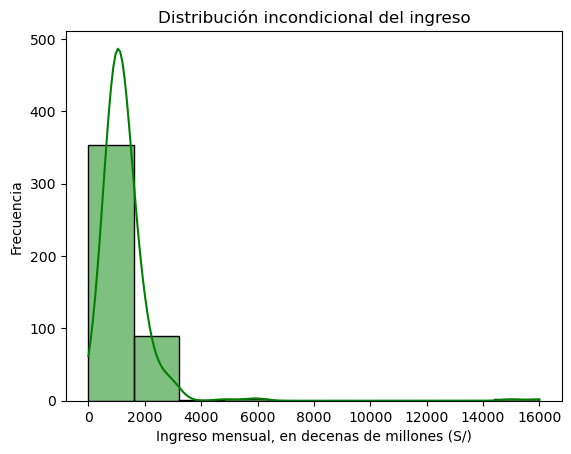

In [575]:
sns.histplot(venezolanos['ingreso_mensual'], kde=True, color="green", bins=10)

plt.title("Distribución incondicional del ingreso")
plt.xlabel("Ingreso mensual, en decenas de millones (S/)")
plt.ylabel("Frecuencia")
plt.show()

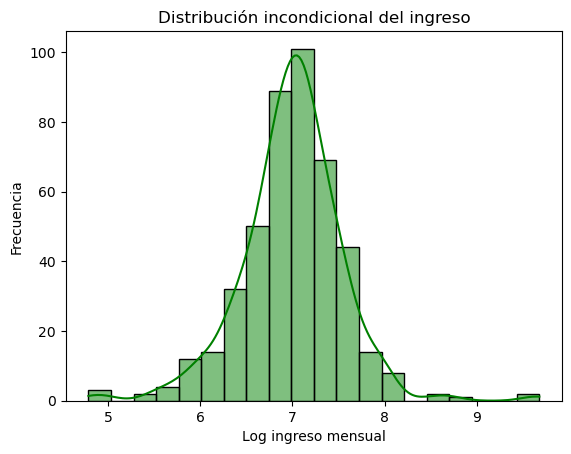

In [577]:
sns.histplot(venezolanos['log_ingreso_mensual'], kde=True, color="green", bins=20)
plt.title("Distribución incondicional del ingreso")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.show()

#### 1.2. Cantidad de horas trabajadas al mes

In [580]:
print("Media:", round(venezolanos['horas_mensual'].mean(),2))
print("Mediana:", round(venezolanos['horas_mensual'].median(),2))
print("Desviación estándar:", round(venezolanos['horas_mensual'].std(),2))
print("Varianza:", round(venezolanos['horas_mensual'].var(),2))
print("Moda:", venezolanos['horas_mensual'].mode()[0])
print("Valor mínimo:", venezolanos['horas_mensual'].min())
print("Valor máximo:", venezolanos['horas_mensual'].max())

Media: 211.31
Mediana: 216.0
Desviación estándar: 74.91
Varianza: 5611.37
Moda: 240.0
Valor mínimo: 8.0
Valor máximo: 432.0


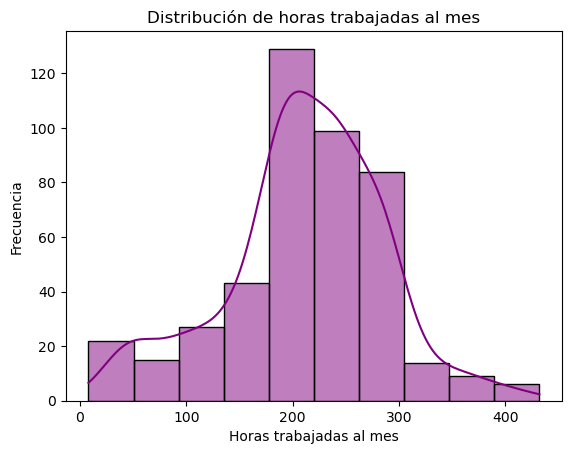

In [582]:
sns.histplot(venezolanos['horas_mensual'], kde=True, color="purple", bins=10)

plt.title("Distribución de horas trabajadas al mes")
plt.xlabel("Horas trabajadas al mes")
plt.ylabel("Frecuencia")
plt.show()

#### 1.3. Distribución según el sexo

In [585]:
venezolanos['sexo'] = venezolanos['sexo'].apply(lambda x: 'hombre' if x == 1 else 'mujer')

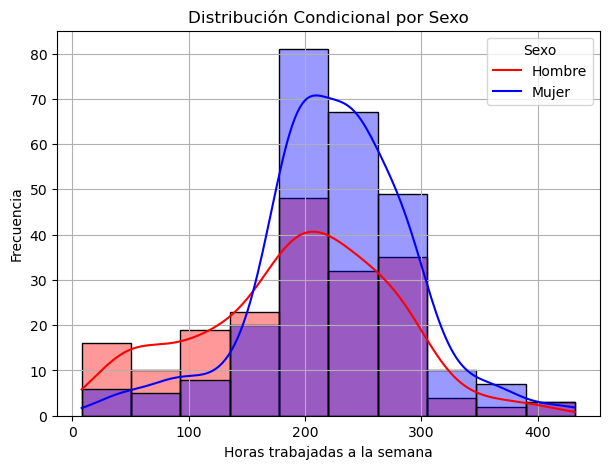

In [587]:
plt.figure(figsize=(7, 5))
sns.histplot(venezolanos, x='horas_mensual', hue='sexo', kde=True, bins=10, 
             palette={'hombre': "blue", 'mujer': "red"}, alpha=0.4)  

# Ajustes del gráfico
plt.title("Distribución Condicional por Sexo")
plt.xlabel("Horas trabajadas a la semana")
plt.ylabel("Frecuencia")
plt.legend(labels=["Hombre", "Mujer"], title="Sexo")
plt.grid(True)
plt.show()

In [589]:
est_hora_sexo = venezolanos.groupby('sexo')['horas_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

est_hora_sexo = est_hora_sexo.round(2)
print(tabulate(est_hora_sexo, headers='keys', tablefmt='grid'))

+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|    | sexo   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+========+=========+===========+============+============+==========+==========+========+
|  0 | hombre |  225.17 |       224 |      65.81 |    4330.35 |       16 |      432 |    240 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | mujer  |  192.83 |       196 |      82.16 |    6750.3  |        8 |      400 |    192 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+


#### 1.4. Distribución según el grupo etario

In [592]:
venezolanos['grupo_etario'] = pd.cut(venezolanos['edad'], 
                                     bins=[0, 17, 34, 64, float('inf')], 
                                     labels=['menor', 'joven', 'adulto', 'adulto mayor'])

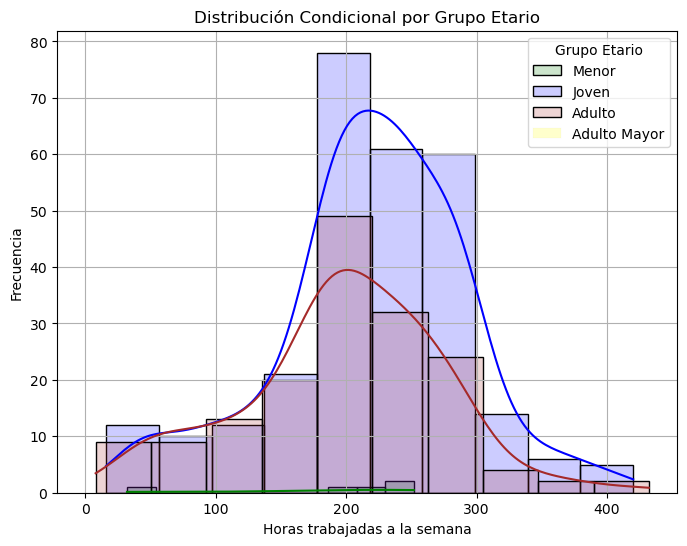

In [594]:
plt.figure(figsize=(8, 6))

# Gráfico para Menor
sns.histplot(data=venezolanos[venezolanos['grupo_etario'] == 'menor'], x='horas_mensual', kde=True, bins=10, 
             color="green", alpha=0.2, label="Menor")

# Gráfico para Joven
sns.histplot(data=venezolanos[venezolanos['grupo_etario'] == 'joven'], x='horas_mensual', kde=True, bins=10, 
             color="blue", alpha=0.2, label="Joven")

# Gráfico para Adulto
sns.histplot(data=venezolanos[venezolanos['grupo_etario'] == 'adulto'], x='horas_mensual', kde=True, bins=10, 
             color="brown", alpha=0.2, label="Adulto")

# Gráfico para Adulto Mayor
sns.histplot(data=venezolanos[venezolanos['grupo_etario'] == 'adulto mayor'], x='horas_mensual', kde=True, bins=10, 
             color="yellow", alpha=0.2, label="Adulto Mayor")

# Ajustes del gráfico
plt.title("Distribución Condicional por Grupo Etario")
plt.xlabel("Horas trabajadas a la semana")
plt.ylabel("Frecuencia")
plt.legend(title="Grupo Etario")

plt.grid(True)
plt.show()

In [596]:
est_hora_edad = venezolanos.groupby('grupo_etario')['horas_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

est_hora_edad = est_hora_edad.round(2)
print(tabulate(est_hora_edad, headers='keys', tablefmt='grid'))

+----+----------------+---------+-----------+------------+------------+----------+----------+--------+
|    | grupo_etario   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+================+=========+===========+============+============+==========+==========+========+
|  0 | menor          |  185.6  |       216 |      89.29 |    7972.8  |       32 |      252 |     32 |
+----+----------------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | joven          |  219.74 |       224 |      72.87 |    5309.4  |       16 |      420 |    240 |
+----+----------------+---------+-----------+------------+------------+----------+----------+--------+
|  2 | adulto         |  197.76 |       200 |      76.23 |    5810.49 |        8 |      432 |    240 |
+----+----------------+---------+-----------+------------+------------+----------+----------+--------+
|  3 | adulto mayor   |  nan    |       nan |     nan    |     nan    |  

#### 1.5. Contaba con trabajo antes de iniciar su viaje

In [599]:
venezolanos['trabajo_venezuela'] = venezolanos['trabajo_venezuela'].apply(lambda x: 'si' if x == 1 else 'no')

##### 1.5.1. En relación al log_ingreso_mensual

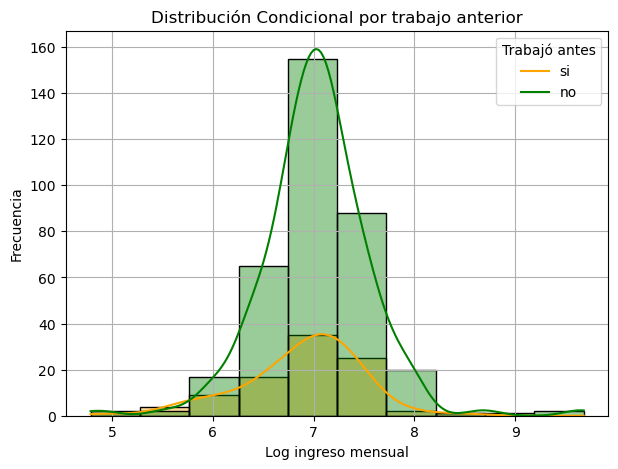

In [602]:
plt.figure(figsize=(7, 5))
sns.histplot(venezolanos, x='log_ingreso_mensual', hue='trabajo_venezuela', kde=True, bins=10, 
             palette={'si': "green", 'no': "orange"}, alpha=0.4)  

# Ajustes del gráfico
plt.title("Distribución Condicional por trabajo anterior")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.legend(labels=["si", "no"], title="Trabajó antes")
plt.grid(True)
plt.show()

In [604]:
est_ingre_trabaj = venezolanos.groupby('trabajo_venezuela')['log_ingreso_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

est_ingre_trabaj = est_ingre_trabaj.round(2)
print(tabulate(est_ingre_trabaj, headers='keys', tablefmt='grid'))

+----+---------------------+---------+-----------+------------+------------+----------+----------+--------+
|    | trabajo_venezuela   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+=====================+=========+===========+============+============+==========+==========+========+
|  0 | no                  |    6.89 |      7.01 |       0.58 |       0.34 |     4.94 |     8.48 |   7.09 |
+----+---------------------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | si                  |    7.03 |      7.09 |       0.53 |       0.28 |     4.79 |     9.68 |   7.09 |
+----+---------------------+---------+-----------+------------+------------+----------+----------+--------+


* Las media y la mediana son cercanas para ambos casos, personas que trabajaron o no previamente en Venezuela, en torno al logaritmo del ingreso mensual.
* Asimismo, quienes cuentan con experiencia previa muestran una mayor variabilidad en torno al ingreso mensual, lo que podría explicarse como un trabajo mejor remunerado debido a los antecedentes de empleo. 

##### 1.5.2. En relación a las horas de trabajo mensual

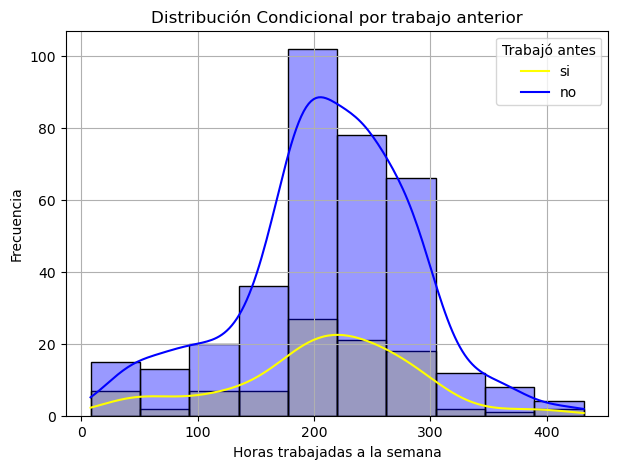

In [608]:
plt.figure(figsize=(7, 5))
sns.histplot(venezolanos, x='horas_mensual', hue='trabajo_venezuela', kde=True, bins=10, 
             palette={'si': "blue", 'no': "yellow"}, alpha=0.4)  

# Ajustes del gráfico
plt.title("Distribución Condicional por trabajo anterior")
plt.xlabel("Horas trabajadas a la semana")
plt.ylabel("Frecuencia")
plt.legend(labels=["si", "no"], title="Trabajó antes")
plt.grid(True)
plt.show()

In [610]:
est_hora_trabajo = venezolanos.groupby('trabajo_venezuela')['horas_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

est_hora_trabajo = est_hora_trabajo.round(2)
print(tabulate(est_hora_trabajo, headers='keys', tablefmt='grid'))

+----+---------------------+---------+-----------+------------+------------+----------+----------+--------+
|    | trabajo_venezuela   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+=====================+=========+===========+============+============+==========+==========+========+
|  0 | no                  |  208    |       216 |      78.33 |    6135.05 |       40 |      400 |    240 |
+----+---------------------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | si                  |  212.19 |       216 |      74.06 |    5485.61 |        8 |      432 |    240 |
+----+---------------------+---------+-----------+------------+------------+----------+----------+--------+


* Tanto para las personas que tuvieron algún trabajo previo en Venezuela, como las que no, la media y la media no se encuentran tan alejadas en ambos casos. 
* Asimismo, quienes trabajaron antes en Venezuela muestran una mayor variabilidad en las horas, esto podría explicarse debido a la capacidad de realizar múltiples tareas y contar con experiencia previa. 

#### 1.6. Trabajo Formal

In [614]:
venezolanos['firma_contrato'] = venezolanos['firma_contrato'].apply(lambda x: 'si' if x == 1 else 'no')

##### 1.6.1. En relación al ingreso mensual

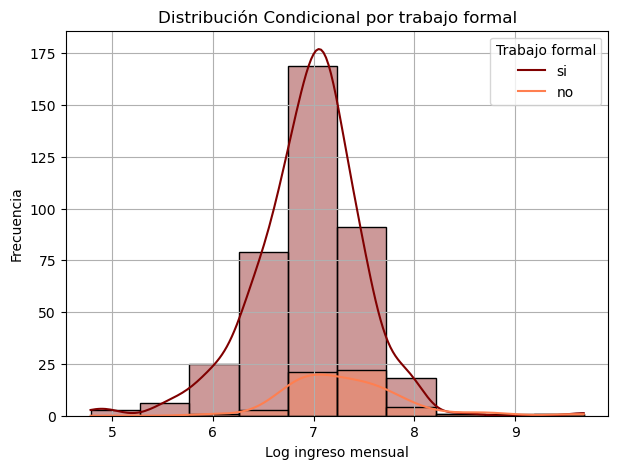

In [617]:
plt.figure(figsize=(7, 5))
sns.histplot(venezolanos, x='log_ingreso_mensual', hue='firma_contrato', kde=True, bins=10, 
             palette={'si': "coral", 'no': "maroon"}, alpha=0.4)  

# Ajustes del gráfico
plt.title("Distribución Condicional por trabajo formal")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.legend(labels=["si", "no"], title="Trabajo formal")
plt.grid(True)
plt.show()

In [619]:
est_ingreso_formal = venezolanos.groupby('firma_contrato')['log_ingreso_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

est_ingreso_formal = est_ingreso_formal.round(2)
print(tabulate(est_ingreso_formal, headers='keys', tablefmt='grid'))

+----+------------------+---------+-----------+------------+------------+----------+----------+--------+
|    | firma_contrato   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+==================+=========+===========+============+============+==========+==========+========+
|  0 | no               |    6.95 |      7.02 |       0.52 |       0.27 |     4.79 |     9.68 |   7.09 |
+----+------------------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | si               |    7.32 |      7.24 |       0.58 |       0.34 |     6.03 |     9.62 |   6.91 |
+----+------------------+---------+-----------+------------+------------+----------+----------+--------+


* Quienes tienen trabajo formal tiene valores más altos en el Log de ingreso mensual. Esto se refuerza con la diferencia en las medianas. 
* Hay más variabilidad entre los que no tienen un trabajo formal. Esto puede explicarse porque, en el mercado informal, no se respeta el mínimo vital y la remuneración varía entre la naturaleza del trabajo por realizar.
* La desviación estándar y la varianza son mayores en el grupo que firmó contrato (0.58 vs. 0.52 en Desv. Est.), lo que indica una mayor dispersión en sus valores.

##### 1.6.2. En relación a horas trabajadas al mes

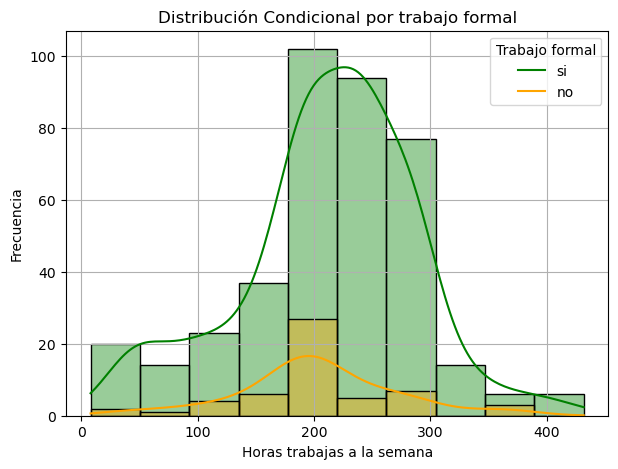

In [623]:
plt.figure(figsize=(7, 5))
sns.histplot(venezolanos, x='horas_mensual', hue='firma_contrato', kde=True, bins=10, 
             palette={'si': "orange", 'no': "green"}, alpha=0.4)  

# Ajustes del gráfico
plt.title("Distribución Condicional por trabajo formal")
plt.xlabel("Horas trabajas a la semana")
plt.ylabel("Frecuencia")
plt.legend(labels=["si", "no"], title="Trabajo formal")
plt.grid(True)
plt.show()

In [625]:
est_trabajo_formal = venezolanos.groupby('firma_contrato')['horas_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

est_trabajo_formal = est_trabajo_formal.round(2)
print(tabulate(est_trabajo_formal, headers='keys', tablefmt='grid'))

+----+------------------+---------+-----------+------------+------------+----------+----------+--------+
|    | firma_contrato   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+==================+=========+===========+============+============+==========+==========+========+
|  0 | no               |  212.42 |       220 |      75.91 |    5761.58 |        8 |      432 |    240 |
+----+------------------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | si               |  203.42 |       200 |      67.47 |    4552.54 |       40 |      364 |    192 |
+----+------------------+---------+-----------+------------+------------+----------+----------+--------+


* Ni la media ni la mediana son cercanas en los casos en los que tienen trabajo formal y los que no.
* Quienes no tienen trabajo formal muestran una mayor variabilidad en las horas, lo que podría explicarse por la demanda heterogénea que tienen los trabajos informales entre si. 

### 2. Prueba estadística - diferencia de medias

Primero procedemos a comprobar la normalidad de distribución

In [630]:
from scipy.stats import shapiro

stat, p = shapiro(venezolanos['log_ingreso_mensual'])
if p > 0.05:
    print("Distribución normal")
else:
    print("Distribución no normal")

Distribución no normal


Como no cumple con la normalidad, utilizamos una prueba no paramétrica como es el caso de Mann- Whitney U test

#### 2.1. Variable: Sexo

- H0: No hay diferencia en el ingreso promedio mensual entre hombres y mujeres.
- H1: Hay una diferencia en el ingreso promedio mensual entre hombres y mujeres.

In [635]:
from scipy.stats import ttest_ind, mannwhitneyu

hombres = venezolanos[venezolanos['sexo'] == 'hombre']['log_ingreso_mensual']
mujeres = venezolanos[venezolanos['sexo'] == 'mujer']['log_ingreso_mensual']

In [637]:
print(hombres.isnull().sum(), mujeres.isnull().sum())  
hombres = hombres.dropna() 
mujeres = mujeres.dropna() 

0 1


In [639]:
# Prueba no paramétrica
stat, p = mannwhitneyu(hombres, mujeres)
print('Mann-Whitney U:', stat, p)

Mann-Whitney U: 30315.5 1.3623369959035217e-05


Como el p-valor es menor que 0.05, rechazamos la hipótesis nula (H0). Esto significa que existe una diferencia significativa en los ingresos mensuales (transformados como logaritmo) entre hombres y mujeres.

#### 2.2. Variable: Trabajo Previo

- H0: La distribución del ingreso es igual para ambos grupos
- H1: La distribución del ingreso es diferente entre los dos grupos 

In [644]:
previo_si = venezolanos[venezolanos['trabajo_venezuela'] == 'si']['log_ingreso_mensual']
previo_no = venezolanos[venezolanos['trabajo_venezuela'] == 'no']['log_ingreso_mensual']

In [646]:
print(previo_si.isnull().sum(), previo_no.isnull().sum())  
previo_si = previo_si.dropna() 
previo_no = previo_no.dropna()

1 0


In [648]:
# Prueba no paramétrica
stat, p = mannwhitneyu(previo_si, previo_no)
print('Mann-Whitney U:', stat, p)

Mann-Whitney U: 18355.0 0.11247819103740771


Dado que el p-valor es mayor que 0.05, rechazamos la hipótesis nula, lo que nos indica que no existen diferencias significativas en el ingreso mensual (transformado a logaritmo) entre aquellas personas que trabajaron previamente en Venezuela y quienes no lo hicieron.

#### 2.3. Variable: Trabajo Formal

- H0: No hay diferencia en el ingreso promedio mensual entre quienes tienen trabajo formal y quienes no.
- H1: Hay una diferencia en el ingreso promedio mensual entre estos grupos.

In [653]:
formal = venezolanos[venezolanos['firma_contrato'] == 'si']['log_ingreso_mensual']
informal = venezolanos[venezolanos['firma_contrato'] == 'no']['log_ingreso_mensual']

In [655]:
print(formal.isnull().sum(), informal.isnull().sum())  
formal = formal.dropna() 
informal = informal.dropna()

1 0


In [657]:
# Prueba no paramétrica
stat, p = mannwhitneyu(formal, informal)
print('Mann-Whitney U:', stat, p)

Mann-Whitney U: 14308.5 3.174831008315929e-05


Dado que el p-valor es menor que 0.05, rechazamos la hipótesis nula (H0). Esto significa que hay una diferencia estadísticamente significativa en el ingreso mensual (o su transformación logarítmica) entre quienes tienen trabajo formal e informal.

### 3. Relación entre variables

#### 3.1. Horas Mensual - Log_ingreso_mensual

##### 3.1.1. Gráfico sobre la relación entre horas de trabajo y logaritmo del ingreso mensual

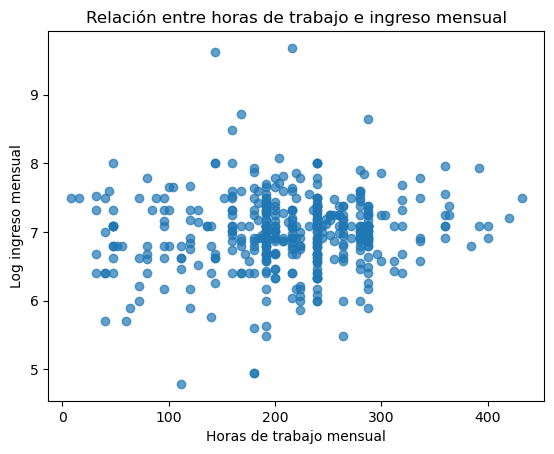

In [663]:
plt.scatter(venezolanos['horas_mensual'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre horas de trabajo e ingreso mensual')
plt.xlabel('Horas de trabajo mensual')
plt.ylabel('Log ingreso mensual')
plt.show()

##### 3.1.2. Regresión Lineal Simple

In [666]:
venezolanos = venezolanos.dropna(subset=['horas_mensual', 'log_ingreso_mensual'])

In [668]:
X = sm.add_constant(venezolanos['horas_mensual'])  # Agregar una constante para el intercepto
y = venezolanos['log_ingreso_mensual']
model2 = sm.OLS(y, X).fit()
y_pred = model2.predict(X)
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.009
Model:                             OLS   Adj. R-squared:                  0.006
Method:                  Least Squares   F-statistic:                     3.860
Date:                 Thu, 20 Feb 2025   Prob (F-statistic):             0.0501
Time:                         19:24:55   Log-Likelihood:                -359.17
No. Observations:                  447   AIC:                             722.3
Df Residuals:                      445   BIC:                             730.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8546      0.077 

##### 3.1.3. Interpretación

- Cada hora trabajada al mes está asociada con un aumento del 0.07 en el logaritmo del ingreso mensual.
- El efecto estadístico es significativo (p = 0.05), aunque el modelo solo explica el 0.09 de la variación en los ingresos, lo que sugiere que otras factores influyen.

##### 3.1.4. Prueba White

In [673]:
residuos = model2.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 5.8470
p-value LM: 0.0537


El p-value de la Prueba de White es 0.0537 (mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad.

##### 3.1.5. Línea de Regresión

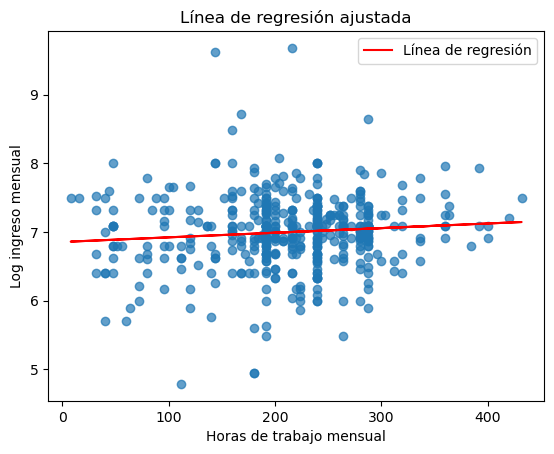

In [677]:
plt.scatter(venezolanos['horas_mensual'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.plot(venezolanos['horas_mensual'], y_pred, color='red', label='Línea de regresión')
plt.title('Línea de regresión ajustada')
plt.xlabel('Horas de trabajo mensual')
plt.ylabel('Log ingreso mensual')
plt.legend()
plt.show()

#### 3.2. Trabajó en Venezuela - Log_ingreso_mensual

##### 3.2.1. Gráfico sobre la relación entre si trabajó previamente en Venezuela y logaritmo del ingreso mensual

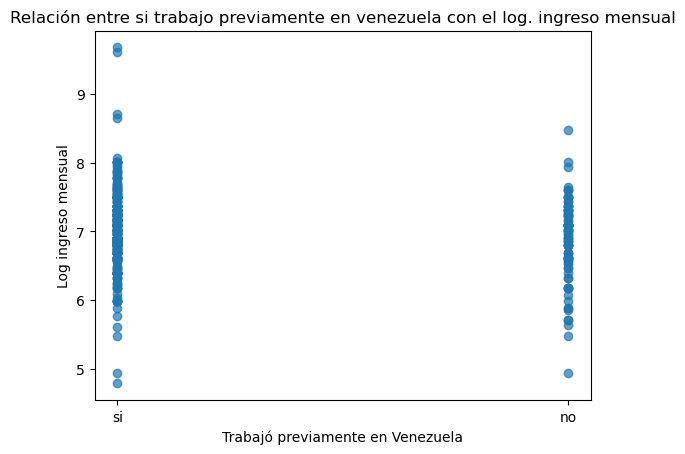

In [681]:
plt.scatter(venezolanos['trabajo_venezuela'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre si trabajo previamente en venezuela con el log. ingreso mensual')
plt.xlabel('Trabajó previamente en Venezuela')
plt.ylabel('Log ingreso mensual')
plt.show()

##### 3.2.2. Regresión Lineal Simple

In [684]:
venezolanos['trabajo_venezuela_num'] = venezolanos['trabajo_venezuela'].replace({'si': 1, 'no': 0}).astype(int)

In [686]:
X = sm.add_constant(venezolanos['trabajo_venezuela_num'])  # Agregar una constante para el intercepto
y = venezolanos['log_ingreso_mensual']
model3 = sm.OLS(y, X).fit()
y_pred = model3.predict(X)
print(model3.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.011
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     4.966
Date:                 Thu, 20 Feb 2025   Prob (F-statistic):             0.0264
Time:                         19:25:06   Log-Likelihood:                -358.62
No. Observations:                  447   AIC:                             721.2
Df Residuals:                      445   BIC:                             729.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

##### 3.2.3. Interpretación

- Si la persona trabajó previamente en Venezuela, el logartimo del ingreso mensual aumenta en 14.
- El efecto estadístico es significativo (p = 0.026), aunque el modelo solo explica el 1.1% de la variación de los ingresos, lo que sugiere que otras factores influyen.

##### 3.2.4. Prueba White

In [691]:
residuos = model3.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 0.5034
p-value LM: 0.4780


El p-value de la Prueba de White es 0.4780 (mucho mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad, es decir, la varianza de los errores es constante.

##### 3.2.5. Línea de regresión

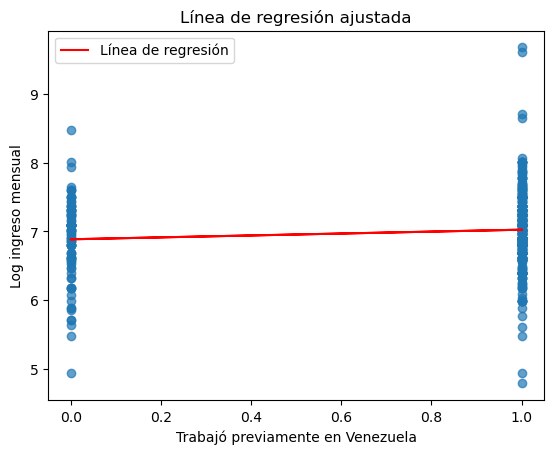

In [695]:
plt.scatter(venezolanos['trabajo_venezuela_num'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.plot(venezolanos['trabajo_venezuela_num'], y_pred, color='red', label='Línea de regresión')
plt.title('Línea de regresión ajustada')
plt.xlabel('Trabajó previamente en Venezuela')
plt.ylabel('Log ingreso mensual')
plt.legend()
plt.show()

#### 3.3. Trabajo Formal - Log_ingreso_mensual

##### 3.3.1. Gráfico sobre la relación entre trabajo formal y logaritmo del ingreso mensual

In [699]:
venezolanos['firma_contrato_num'] = venezolanos['firma_contrato'].replace({'si': 1, 'no':0}).astype(int) 

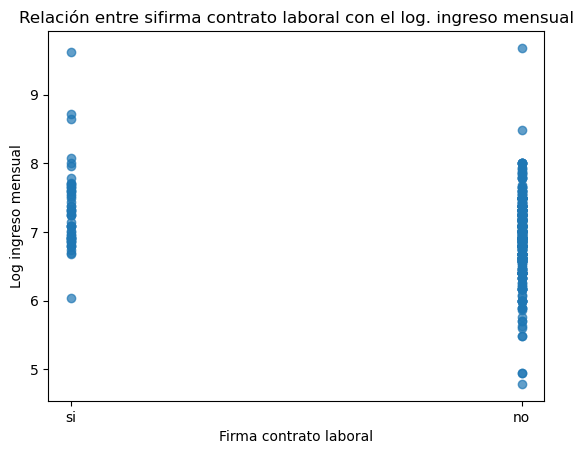

In [701]:
plt.scatter(venezolanos['firma_contrato'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre sifirma contrato laboral con el log. ingreso mensual')
plt.xlabel('Firma contrato laboral')
plt.ylabel('Log ingreso mensual')
plt.show()

##### 3.3.2. Regresión Lineal Simple

In [704]:
X = sm.add_constant(venezolanos['firma_contrato_num'])  # Agregar una constante para el intercepto
y = venezolanos['log_ingreso_mensual']
model4 = sm.OLS(y, X).fit()
y_pred = model4.predict(X)
print(model4.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                  0.047
Method:                  Least Squares   F-statistic:                     23.07
Date:                 Thu, 20 Feb 2025   Prob (F-statistic):           2.14e-06
Time:                         19:25:19   Log-Likelihood:                -349.81
No. Observations:                  447   AIC:                             703.6
Df Residuals:                      445   BIC:                             711.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.9

##### 3.3.3. Interpretación

- Si la persona firma contrato laboral, el logaritmo del ingreso mensual aumenta en 37.
- El efecto es estadísticamente significativo (p = 0.000), aunque el modelo solo explica el 4.9% de la variación en los ingresos, lo que sugiere que otros factores influyen más en el ingreso mensual.

##### 3.3.4. Prueba White

In [709]:
residuos = model4.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 0.3722
p-value LM: 0.5418


El p-value de la Prueba de White es 0.5418 (mucho mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad, es decir, la varianza de los errores es constante.

##### 3.3.5. Línea de regresión

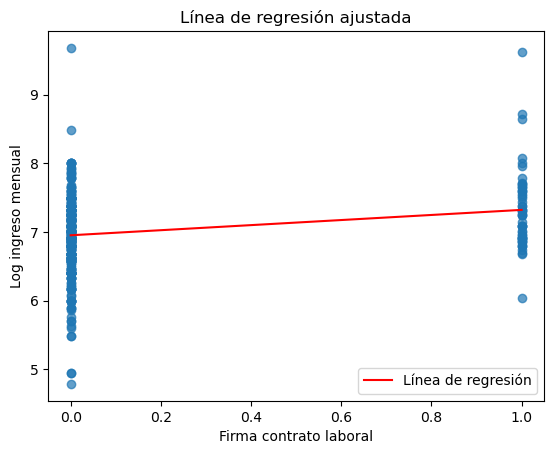

In [713]:
plt.scatter(venezolanos['firma_contrato_num'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.plot(venezolanos['firma_contrato_num'], y_pred, color='red', label='Línea de regresión')
plt.title('Línea de regresión ajustada')
plt.xlabel('Firma contrato laboral')
plt.ylabel('Log ingreso mensual')
plt.legend()
plt.show()

#### 3.4. Edad - Log_ingreso_mensual

##### 3.4.1. Gráfico sobre la relación entre edad y logritmo del ingreso mensual

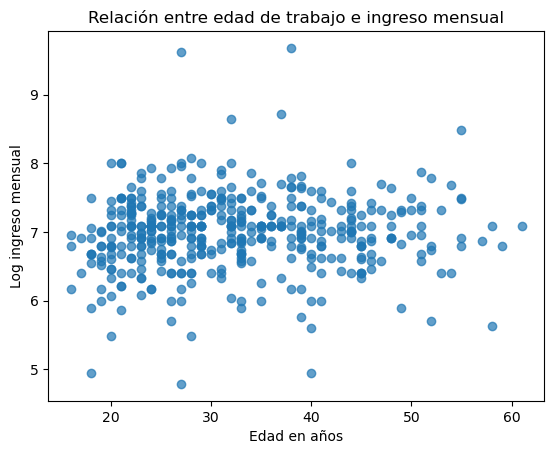

In [717]:
plt.scatter(venezolanos['edad'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre edad de trabajo e ingreso mensual')
plt.xlabel('Edad en años')
plt.ylabel('Log ingreso mensual')
plt.show()

##### 3.4.2. Regresión Lineal Simple

In [720]:
X = sm.add_constant(venezolanos['edad']) 
y = venezolanos['log_ingreso_mensual']
model5 = sm.OLS(y, X).fit()
y_pred = model5.predict(X)
print(model5.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.239
Date:                 Thu, 20 Feb 2025   Prob (F-statistic):              0.266
Time:                         19:25:32   Log-Likelihood:                -360.48
No. Observations:                  447   AIC:                             725.0
Df Residuals:                      445   BIC:                             733.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9028      0.088     78.24

##### 3.4.3. Interpretación

- Por cada año de aumenta en la edad de la persona, el logaritmo del ingreso mensual aumenta en 0.29.
- El efecto no es estadísticamente significativo (p = 0.266). Asimismo, el modelo solo explica el 0.3% de la variabilidad de la dependiente

##### 3.4.4. Prueba White

In [725]:
residuos = model5.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 0.0568
p-value LM: 0.9720


El p-value de la Prueba de White es 0.9720 (mucho mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad, es decir, la varianza de los errores es constante.

#### 3.5. Educación - Log_ingreso_mensual

##### 3.5.1. Gráfico sobre la relación entre educación y logritmo del ingreso mensual

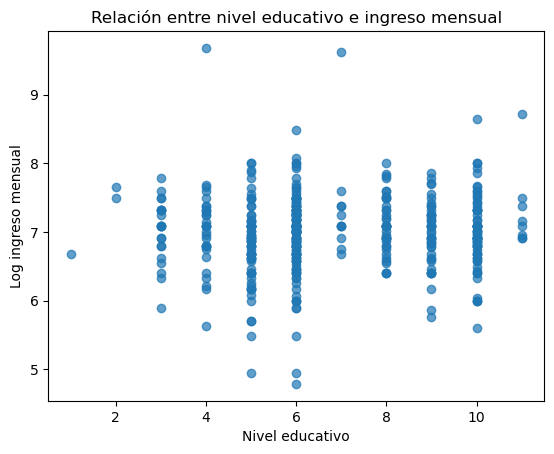

In [730]:
plt.scatter(venezolanos['nivel_educativo'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre nivel educativo e ingreso mensual')
plt.xlabel('Nivel educativo')
plt.ylabel('Log ingreso mensual')
plt.show()

##### 3.5.2. Regresión Lineal Simple

In [732]:
venezolanos.dtypes

jefe_hogar                  int64
sexo                       object
edad                      float64
firma_contrato             object
migracion_venezuela         int64
trabajo_venezuela          object
estrato                     int64
ingreso_mensual           float64
log_ingreso_mensual       float64
horas_mensual             float64
nivel_educativo           float64
grupo_etario             category
trabajo_venezuela_num       int32
firma_contrato_num          int32
dtype: object

In [734]:
#creamos una variable dummy para el nivel educativo cuando es igual a 10, ya que representa el nivel Superior Universitaria Completa
venezolanos['uni_completa'] = (venezolanos['nivel_educativo'] == 10).astype(int)
venezolanos.head()

,jefe_hogar,sexo,edad,firma_contrato,migracion_venezuela,trabajo_venezuela,estrato,ingreso_mensual,log_ingreso_mensual,horas_mensual,nivel_educativo,grupo_etario,trabajo_venezuela_num,firma_contrato_num,uni_completa
0,1,hombre,36.0,si,1,si,5,1600.0,7.377759,364.0,8.0,adulto,1,1,0
19,3,hombre,16.0,no,1,no,3,480.0,6.173786,240.0,5.0,menor,0,0,0
35,1,mujer,33.0,no,1,si,3,1400.0,7.244228,288.0,9.0,joven,1,0,0
58,1,mujer,47.0,si,1,si,2,2200.0,7.696213,240.0,9.0,adulto,1,1,0
62,1,hombre,30.0,no,1,si,2,1600.0,7.377759,192.0,9.0,joven,1,0,0


In [736]:
X = sm.add_constant(venezolanos['uni_completa']) 
y = venezolanos['log_ingreso_mensual']
model6 = sm.OLS(y, X).fit()
y_pred = model6.predict(X)
print(model6.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                   0.01953
Date:                 Thu, 20 Feb 2025   Prob (F-statistic):              0.889
Time:                         19:27:31   Log-Likelihood:                -361.09
No. Observations:                  447   AIC:                             726.2
Df Residuals:                      445   BIC:                             734.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.9952      0.028    

##### 3.5.3. Interpretación

- Si la persona cuenta con educación Superior Universitaria Completa el logaritmo del ingreso mensual aumenta en 0.98.
- El efecto no es estadísticamente significativo (p = 0.889). Asimismo, el modelo solo explica el 0% de la variabilidad de la dependiente

##### 3.5.4. Prueba White

In [741]:
residuos = model6.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 21.3947
p-value LM: 0.2091


El p-value de la Prueba de White es 0.2091 (mucho mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad, es decir, la varianza de los errores es constante.

### 4. Regresión Múltiple

In [744]:
y = venezolanos['log_ingreso_mensual']  
X = venezolanos[['horas_mensual', 'trabajo_venezuela_num', 'firma_contrato_num', 'edad', 'uni_completa' ]]  

X = sm.add_constant(X)
model_final = sm.OLS(y, X).fit()

y_pred = model_final.predict(X)

print(model_final.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.072
Model:                             OLS   Adj. R-squared:                  0.061
Method:                  Least Squares   F-statistic:                     6.810
Date:                 Thu, 20 Feb 2025   Prob (F-statistic):           3.92e-06
Time:                         19:31:36   Log-Likelihood:                -344.48
No. Observations:                  447   AIC:                             701.0
Df Residuals:                      441   BIC:                             725.6
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

#### Interpretación

**Coeficientes de regresión parcial**:
- La constancia es de 6.6405, lo que indica el valor esperado del log del ingreso mensual cuando todas las variables son 0.

- Cada hora adicional de trabajo mensual aumenta el log del ingreso mensual en 0.07. Esta variable es estadísticamente significativa (p = 0.031).

- Haber trabajado en Venezuela antes de migrar al Perú se asocia con un incremento del ingreso mensual en 13.18 Esta variable es significativa (p = 0.038).

-  Firma un contrato laboral está asociado con un aumento del ingreso mensual del 37.81. Esta variable es altamente significativa (p < 0.001).

-  La edad tiene un coeficiente de 0.0017, lo que indica un incremento del 0.19 en el ingreso mensual por cada año adicional. Sin embargo, esta variable no es significativa (p = 0.476).

-  El nivel educativo con estudios universitarios completos en Venezuela tiene un coeficiente de -0.0525, lo que indica una disminuición de 5.25 en el ingreso mensual por cada aumento en el nivel educativo. Sin embargo, esta variable no es significativa (p = 0.455)

**Estadística F y bondad de ajuste**:
- El estadístico F es 6810, con un valor-p menor a 0.05, lo que indica que el modelo es globalmente significativo

- El R^2 es 0.072, lo que significa que solo el 7.2% de la variabilidad en el log del ingreso mensual es explicada por el modelo.

- El R^2 ajustado es 0.061, lo que indica que el modelo tiene un poder explicativo bajo.

**Diagnóstico de supuestos**:

- La prueba de Omnibus (p = 0.000) y la prueba de Jarque-Bera indican que los residuos no siguen una distribución normal.

- La kurtosis de 6.151 sugiere colas más pesadas de lo normal.

- El estadístico Durbin-Watson es 1.764, lo que sugiere que no hay una autocrrelación fuerte en los residuos.

**Conclusión general**:

- Las variables *horas_mensual*, *trabajo_venezuela_num* y *firma_contrato_num* son significativas, mientras que edad y el nivel educativo no lo son.

- El modelo explica solo el 7.2% de la variabilidad del ingreso mensual, lo que indica que hay otros factores clave no incluidos.

- Los residuos no siguen una distribución normal, lo que podría afectar la validez de los intervalos de confianza.

- No parece haber un problema grave de autocorrelación.

#### 4.1. Homocedasticidad

In [747]:
# Extraer residuos del modelo
residuos = model_final.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 17.7940
p-value LM: 0.4019


**Interpretación:** El p-value de la prueba de White es mayor a 0.05, lo que significa no se rechaza la hipótesis nula. Es decir, hay presencia de heterocedasticidad.

#### 4.2. No Multicolinealidad

In [749]:
# Multicolinealidad

# Calcular VIF para cada variable explicativa
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados
print(vif_data)

                Variable        VIF
0                  const  23.500782
1          horas_mensual   1.019834
2  trabajo_venezuela_num   1.070285
3     firma_contrato_num   1.017692
4                   edad   1.093343
5           uni_completa   1.061277


**Interpretación:** No hay evidencia de multicolinealidad. Los resultados de VIF están debajo del 5, lo que sugirere que no tienen una correlación problemática entre si.

### 5. Análisis empleando una variable dicotómica

#### 5.1. Creación de variable dicotómica

En nuestro caso nos encontramos empleando la variable "ingreso_mensual" como dependiente, por lo que para convertirla a una variable dicotómica la empleamos en función del sueldo mínimo peruano hasta el momento en el que se recogió información del censo (Febrero - 2022). 

La observación asume un valor de 0 en la columna "mas_minimo" si es que recibió un monto inferior al sueldo minímo nacional y un valor de 1 si es que recibió un valor mayor o igual.

In [753]:
venezolanos["mas_minimo"] = venezolanos["ingreso_mensual"].apply(lambda x: 1 if x >= 930 else 0)
venezolanos

,jefe_hogar,sexo,edad,firma_contrato,migracion_venezuela,trabajo_venezuela,estrato,ingreso_mensual,log_ingreso_mensual,horas_mensual,nivel_educativo,grupo_etario,trabajo_venezuela_num,firma_contrato_num,uni_completa,mas_minimo
0,1,hombre,36.0,si,1,si,5,1600.0,7.377759,364.0,8.0,adulto,1,1,0,1
19,3,hombre,16.0,no,1,no,3,480.0,6.173786,240.0,5.0,menor,0,0,0,0
35,1,mujer,33.0,no,1,si,3,1400.0,7.244228,288.0,9.0,joven,1,0,0,1
58,1,mujer,47.0,si,1,si,2,2200.0,7.696213,240.0,9.0,adulto,1,1,0,1
62,1,hombre,30.0,no,1,si,2,1600.0,7.377759,192.0,9.0,joven,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12340,2,hombre,22.0,no,1,no,3,2100.0,7.649693,192.0,2.0,joven,0,0,0,1
12342,11,hombre,26.0,no,1,si,3,1800.0,7.495542,160.0,2.0,joven,1,0,0,1
12402,1,mujer,40.0,no,1,si,4,750.0,6.620073,72.0,5.0,adulto,1,0,0,0
12453,1,hombre,35.0,no,1,si,4,1000.0,6.907755,192.0,6.0,adulto,1,0,0,1


In [755]:
#revisamos el tipo de nuestra data
venezolanos.dtypes

jefe_hogar                  int64
sexo                       object
edad                      float64
firma_contrato             object
migracion_venezuela         int64
trabajo_venezuela          object
estrato                     int64
ingreso_mensual           float64
log_ingreso_mensual       float64
horas_mensual             float64
nivel_educativo           float64
grupo_etario             category
trabajo_venezuela_num       int32
firma_contrato_num          int32
uni_completa                int32
mas_minimo                  int64
dtype: object

In [757]:
#transformamos a categóricas nuestras variables
venezolanos['estrato'] = venezolanos['estrato'].astype('category')
venezolanos['sexo'] = venezolanos['sexo'].map({'mujer': 0, 'hombre': 1}).astype('category')
venezolanos.head()

,jefe_hogar,sexo,edad,firma_contrato,migracion_venezuela,trabajo_venezuela,estrato,ingreso_mensual,log_ingreso_mensual,horas_mensual,nivel_educativo,grupo_etario,trabajo_venezuela_num,firma_contrato_num,uni_completa,mas_minimo
0,1,1,36.0,si,1,si,5,1600.0,7.377759,364.0,8.0,adulto,1,1,0,1
19,3,1,16.0,no,1,no,3,480.0,6.173786,240.0,5.0,menor,0,0,0,0
35,1,0,33.0,no,1,si,3,1400.0,7.244228,288.0,9.0,joven,1,0,0,1
58,1,0,47.0,si,1,si,2,2200.0,7.696213,240.0,9.0,adulto,1,1,0,1
62,1,1,30.0,no,1,si,2,1600.0,7.377759,192.0,9.0,joven,1,0,0,1


In [759]:
venezolanos.shape

(447, 16)

### 6. Regresión Logística

In [762]:
y = venezolanos['mas_minimo']  
X = venezolanos[['horas_mensual', 'trabajo_venezuela_num', 'firma_contrato_num', 'edad', 'sexo', 'estrato', 'uni_completa']]  

X = sm.add_constant(X)

# Modelo Logit
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.585238
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             mas_minimo   No. Observations:                  447
Model:                          Logit   Df Residuals:                      439
Method:                           MLE   Df Model:                            7
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                 0.07364
Time:                        19:39:12   Log-Likelihood:                -261.60
converged:                       True   LL-Null:                       -282.40
Covariance Type:            nonrobust   LLR p-value:                 6.234e-07
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2832      0.615     -2.085      0.037      -2.489      -0.

**Interpretación**:

- Trabajar más horas al mes está asociado significativamente (p = 0.002) a una mayor probabilidad de ganar al menos 930.

- Haber trabajado previamente en Venezuela no se encuentra asociado significativamente (p = 0.526) con la probabilidad de ganar el sueldo mínimo o más en el Perú.

- Tener un contrato formal está asociado significativamente (p = 0.001) a una mayor probabilidad de ganar al menos 930 soles al mes.

- La edad no se encuentra asociada significativamente (p = 0.149) a una mayor probabilidad de ganar más de sueldo mínimo.

- Ser mujer está asociado significativamente (p = 0.001) a una menor probabilidad de ganar menos de 930 soles al mes.

- Pertenecer a un estrato alto no está asociado significativamente (p = 0.628) con ganar el sueldo mínimo.

- Poseer estudios universitarios completos en Venezuela no se encuentra asociado significativamente (p = 0.170) con ganar el sueldo mínimo.

#### 6.1. Efectos Marginales

##### 6.1.1. Efectos Marginales en la media de las variables

In [766]:
marginal_effects = logit_model.get_margeff(method="dydx", at="mean")  
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:             mas_minimo
Method:                          dydx
At:                              mean
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
horas_mensual             0.0010      0.000      3.169      0.002       0.000       0.002
trabajo_venezuela_num     0.0360      0.057      0.635      0.525      -0.075       0.147
firma_contrato_num        0.3086      0.090      3.425      0.001       0.132       0.485
edad                      0.0035      0.002      1.445      0.149      -0.001       0.008
sexo                      0.1576      0.049      3.240      0.001       0.062       0.253
estrato                  -0.0114      0.024     -0.484      0.628      -0.058       0.035
uni_completa              0.0111      0.066      0.170      0.865      -0.117       0.140


**Interpretación**

- Trabajar más horas al mes está asociado significativamente a una mayor probabilidad de ganar al menos 930 soles al mes. Cada hora adicional trabajada aumenta la probabilidad en 0.10 puntos porcentuales.

- Trabajar previamente en Venezuela no está asociado significativamente con ganar el sueldo mínimo.

- Tener un contrato formal está asociado significativamente a una mayor probabilidad de ganar el sueldo mínimo. Tener un contrato aumenta la probabilidad en 30.86 puntos porcentuales.

- La edad no se encuentra asociada significativamente a una mayor probabilidad de ganar por lo menos el sueldo mínimo.

- Ser mujer está asociado significativamente a una menor probabilidad de ganar menos de 930 soles por mes. Disminuye la probabilidad en 15.76 puntos porcentuales.

- Pertenecer a un estrato alto no está asociado significativamente a una menor probabilidad de ganar al menos 930 soles. 

##### 6.1.2. Efectos Marginales en el promedio de toda la muestra

In [770]:
marginal_overall = logit_model.get_margeff(method="dydx", at="overall")
print(marginal_overall.summary())

        Logit Marginal Effects       
Dep. Variable:             mas_minimo
Method:                          dydx
At:                           overall
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
horas_mensual             0.0009      0.000      3.296      0.001       0.000       0.001
trabajo_venezuela_num     0.0338      0.053      0.636      0.525      -0.070       0.138
firma_contrato_num        0.2897      0.083      3.477      0.001       0.126       0.453
edad                      0.0033      0.002      1.454      0.146      -0.001       0.008
sexo                      0.1479      0.044      3.370      0.001       0.062       0.234
estrato                  -0.0107      0.022     -0.485      0.628      -0.054       0.033
uni_completa              0.0105      0.062      0.170      0.865      -0.110       0.131


**Interpretación**

- En torno a los efectos marginales en el promedio de toda la muestra, cada hora adicional de trabajo aumenta la probabilidad en 0.09 puntos porcentuales de ganar por lo menos el sueldo mínimo.

- Trabajar en Venezuela no está asociado significativamente con la probabilidad de ganar el sueldo mínimo.

- Tener un controato formal sí se encuentra asociado a la probabilidad de ganar el sueldo mínimo. Tener un contrato aumenta la probabilidad en 28.97 puntos porcentuales.

- La edad no se encuentra asociada significativamente con la probabilidad de ganar el sueldo mínimo.

- Ser mujer está asociado significativamente a una menor probabilidad de ganar al menos 930. Se reduce la probabilidad en 14.79 puntos porcentuales.

- Pertenecer a un estrato alto no está asociado significativamente a probabilidad de ganar por lo menos el sueldo mínimo.

- Asimismo, poseer una educación universitaria completa en Venezuela tampoco se encuentra asociado significativamente a la probabilidad de ganar por lo menos el sueldo mínimo. 

#### 6.2. Log Odds

In [774]:
log_odds = logit_model.params
print("Log-Odds (Coeficientes en escala logit):")
print(log_odds)

Log-Odds (Coeficientes en escala logit):
const                   -1.283198
horas_mensual            0.004619
trabajo_venezuela_num    0.168799
firma_contrato_num       1.447026
edad                     0.016368
sexo                     0.738870
estrato                 -0.053448
uni_completa             0.052259
dtype: float64


#### 6.3. Odds Ratio

In [777]:
#odds ratio
odds_ratios = np.exp(logit_model.params)
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
const                    0.277150
horas_mensual            1.004630
trabajo_venezuela_num    1.183882
firma_contrato_num       4.250455
edad                     1.016503
sexo                     2.093568
estrato                  0.947955
uni_completa             1.053648
dtype: float64


#### 6.4. Obtener predicciones de probabilidad

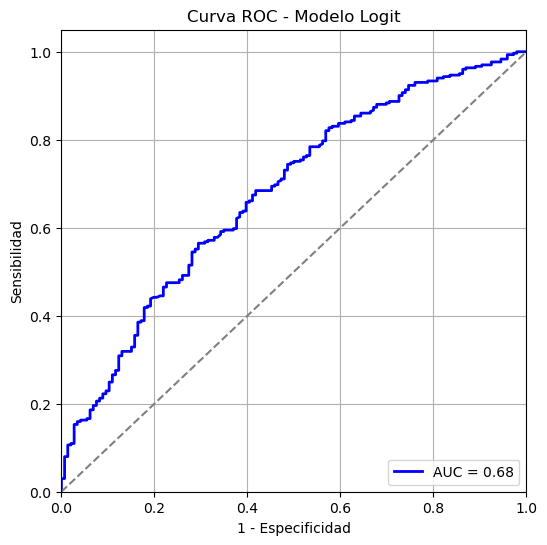

In [780]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = logit_model.predict(X)

# Calcular valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)  # Área bajo la curva (AUC)

# Graficar la curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (modelo aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC - Modelo Logit')
plt.legend(loc='lower right')
plt.grid()
plt.show()

La curva ROC muestra que el modelo Logit tiene una capacidad de predicción baja (AUC = 0.68), lo que sugiere que no es muy efectivo en diferenciar personas de origen venezolano que ganan o no el sueldo mínimo.

#### 6.5. Poder Predictivo

In [784]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Elegir un umbral de clasificación
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
# tn: true negatives
# fp: falsos positivos
# fn: false negatives
# tp: true positives

# Calcular sensibilidad y especificidad
sensibilidad = tp / (tp + fn)  # Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)
especificidad = tn / (tn + fp)  # Verdaderos Negativos / (Verdaderos Negativos + Falsos Positivos)

print(f"Sensibilidad (TPR): {sensibilidad:.2f}")
print(f"Especificidad (TNR): {especificidad:.2f}")

Sensibilidad (TPR): 0.92
Especificidad (TNR): 0.25


Sensibilidad (TPR, True Positive Rate): Mide la capacidad del modelo para identificar correctamente los casos positivos (sueldo mínimo sí: 1).

* Muy alta capacidad del modelo para detectar si las personas ganan el sueldo mínimo. El 92% de los venezolanos que ganan sueldo mínimo fueron correctamente identificados.

Especificidad (TNR, True Negative Rate): Mide la capacidad del modelo para identificar correctamente los casos negativos (sueldo mínimo no: 2).

* Baja capacidad para identificar venezolanos que no ganan el sueldo mínimo. El modelo clasifica correctamente solo el 25% de los venezolanos que no ganan sueldo mínimo fueron correctamente identificados.